In [27]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

# Define the stock symbol and the start and end dates
symbol = "AAPL"
start_date = "2000-01-01"
end_date = "2021-01-01"

# Retrieve the stock data from Yahoo Finance
stock_data = yf.download(symbol, start=start_date, end=end_date)

# Calculate the log returns of the stock
log_returns = np.log(stock_data['Adj Close']).diff().dropna()# dropna() removes the first element which is NaN




[*********************100%***********************]  1 of 1 completed


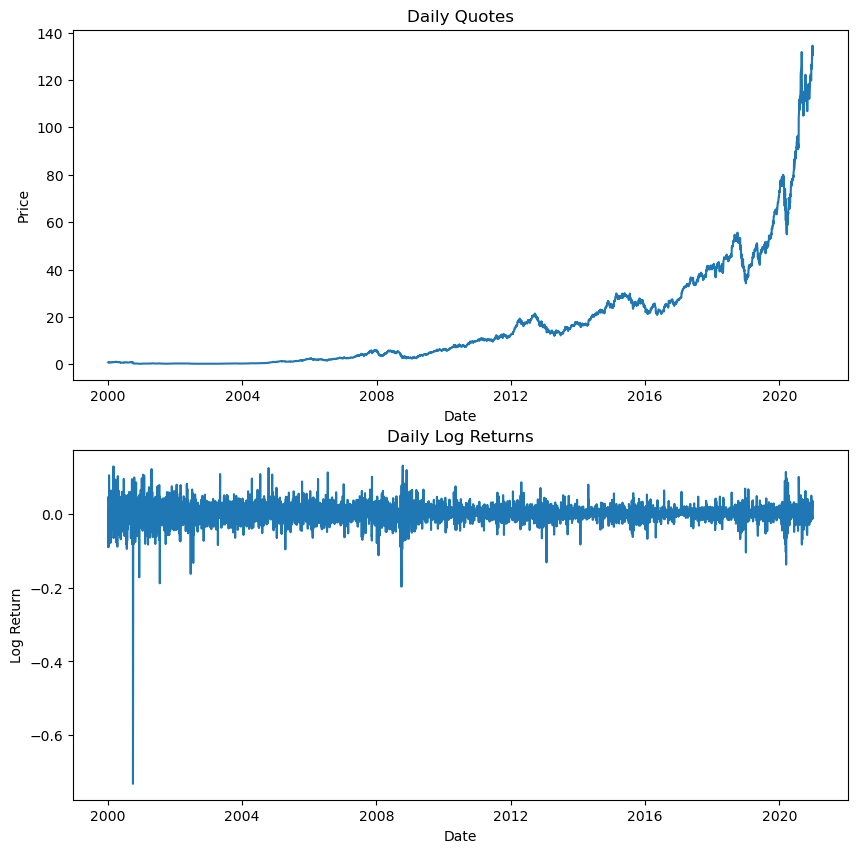

In [28]:
# Plot daily quotes and daily log returns in separate subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot daily quotes
ax1.plot(stock_data['Adj Close'])
ax1.set_title('Daily Quotes')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')

# Plot daily log returns
ax2.plot(log_returns)
ax2.set_title('Daily Log Returns')
ax2.set_xlabel('Date')
ax2.set_ylabel('Log Return')

# Show the plots
plt.show()


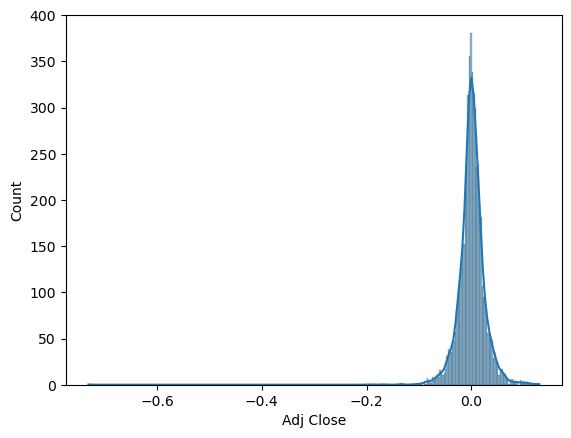

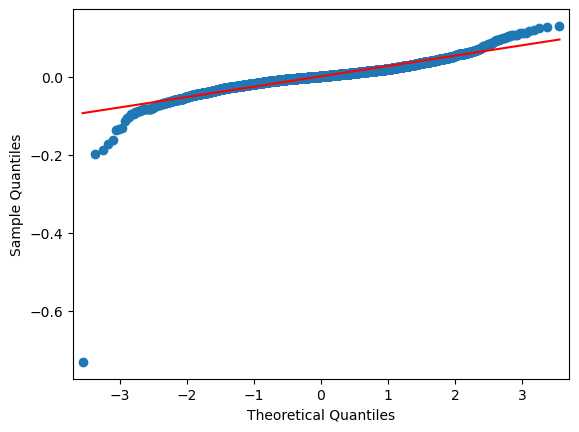

In [29]:
# Create histogram of log returns
sns.histplot(log_returns, kde=True) # kde=True adds the kernel density estimate line

# Create q-q plot of log returns
qqplot(log_returns, line='s')

# Show the plots
plt.show()

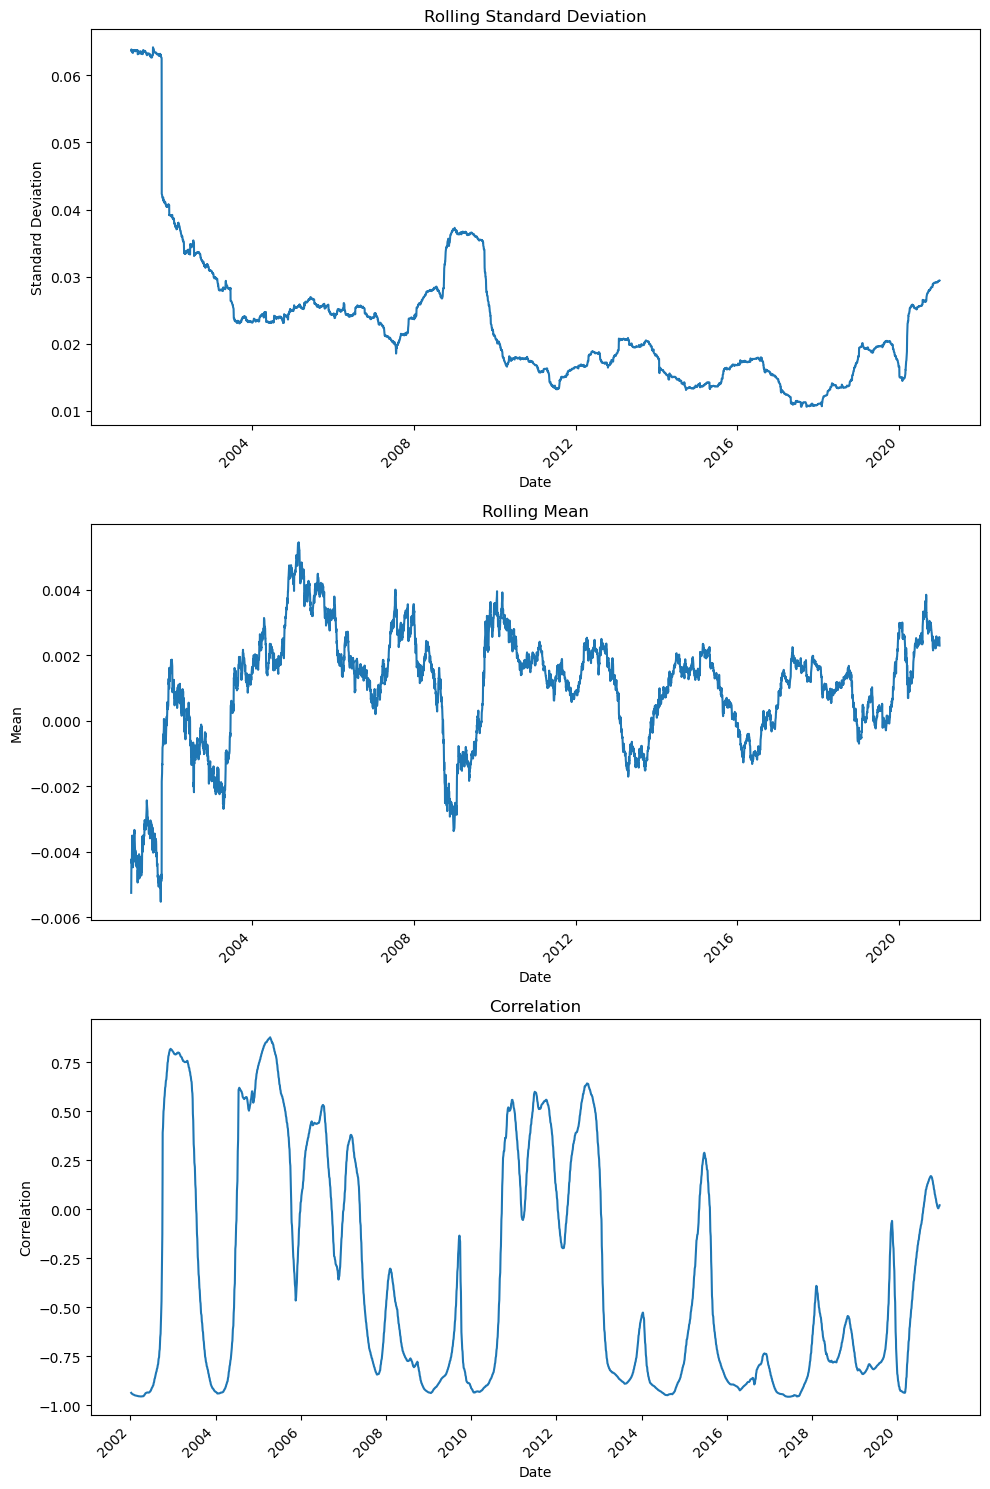

In [42]:
# Calculating the 252-day rolling standard deviation of the log returns
rolling_std = log_returns.rolling(window=252).std().dropna()

# Calculate the 252-day rolling mean of the log returns
rolling_mean = log_returns.rolling(window=252).mean().dropna()

# Calculate the correlation between the rolling standard deviation and the rolling mean
corr = rolling_std.rolling(window=252).corr(rolling_mean).dropna()

# Plot the rolling standard deviation, rolling mean, and correlation
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

# Plot rolling standard deviation
rolling_std.plot(ax=ax1, label='Rolling Std')
ax1.set_title('Rolling Standard Deviation')
ax1.set_ylabel('Standard Deviation')
ax1.set_xlabel('Date')  # Add X-axis label
ax1.tick_params(axis='x', rotation=45)  # Rotate X-axis labels

# Plot rolling mean
rolling_mean.plot(ax=ax2, label='Rolling Mean')
ax2.set_title('Rolling Mean')
ax2.set_ylabel('Mean')
ax2.set_xlabel('Date')  # Add X-axis label
ax2.tick_params(axis='x', rotation=45)  # Rotate X-axis labels

# Plot correlation
corr.plot(ax=ax3, label='Correlation')
ax3.set_title('Correlation')
ax3.set_ylabel('Correlation')
ax3.set_xlabel('Date')  # Add X-axis label
ax3.tick_params(axis='x', rotation=45)  # Rotate X-axis labels

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()
